In [93]:
import pandas as pd

In [94]:
df = pd.read_csv('UN_city_pop_projections_long.csv')

In [95]:
df

,Unnamed: 0,Region,Country_Code,Country_or_area,City_Code,City,City_Definition,Latitude,Longitude,year,population
0,0,Africa,12,Algeria,20009,Annaba,Urban Agglomeration,36.900000,7.766670,1950,99.741
1,1,Africa,12,Algeria,20011,Batna,City Proper,35.555970,6.174140,1950,13.046
2,2,Africa,12,Algeria,20015,Blida,Urban Agglomeration,36.480781,2.831943,1950,33.970
3,3,Africa,12,Algeria,20006,El Djazaïr (Algiers),Urban Agglomeration,36.752500,3.041970,1950,516.450
4,4,Africa,12,Algeria,20020,El Djelfa,Urban Agglomeration,34.672790,3.263000,1950,10.450
...,...,...,...,...,...,...,...,...,...,...,...
19001,19001,Africa,894,Zambia,23277,Lusaka,Urban Agglomeration,-15.413374,28.277148,2035,5182.669
19002,19002,Africa,894,Zambia,23279,Ndola,City Proper,-12.958670,28.636590,2035,925.726
19003,19003,Africa,716,Zimbabwe,22510,Bulawayo,City Proper,-20.150000,28.583330,2035,874.479
19004,19004,Africa,716,Zimbabwe,22511,Chitungwiza,City Proper,-18.012740,31.075550,2035,552.027


In [96]:
df.Country_or_area.unique()

array(['Algeria', 'Angola', 'Benin', 'Burkina Faso', 'Burundi',
       'Cameroon', 'Central African Republic', 'Chad', 'Congo',
       "Côte d'Ivoire", 'Democratic Republic of the Congo', 'Djibouti',
       'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon',
       'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Kenya', 'Liberia',
       'Libya', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Morocco',
       'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Rwanda', 'Senegal',
       'Sierra Leone', 'Somalia', 'South Africa', 'South Sudan', 'Sudan',
       'Togo', 'Tunisia', 'Uganda', 'United Republic of Tanzania',
       'Zambia', 'Zimbabwe'], dtype=object)

In [97]:
df[df['Country_or_area']=='Congo']

,Unnamed: 0,Region,Country_Code,Country_or_area,City_Code,City,City_Definition,Latitude,Longitude,year,population
33,33,Africa,178,Congo,20848,Brazzaville,City Proper,-4.26583,15.28318,1950,83.390
34,34,Africa,178,Congo,20849,Pointe-Noire,City Proper,-4.77609,11.86352,1950,16.322
254,254,Africa,178,Congo,20848,Brazzaville,City Proper,-4.26583,15.28318,1951,84.976
255,255,Africa,178,Congo,20849,Pointe-Noire,City Proper,-4.77609,11.86352,1951,18.981
475,475,Africa,178,Congo,20848,Brazzaville,City Proper,-4.26583,15.28318,1952,86.595
...,...,...,...,...,...,...,...,...,...,...,...
18377,18377,Africa,178,Congo,20849,Pointe-Noire,City Proper,-4.77609,11.86352,2033,1824.270
18597,18597,Africa,178,Congo,20848,Brazzaville,City Proper,-4.26583,15.28318,2034,3718.556
18598,18598,Africa,178,Congo,20849,Pointe-Noire,City Proper,-4.77609,11.86352,2034,1879.953
18818,18818,Africa,178,Congo,20848,Brazzaville,City Proper,-4.26583,15.28318,2035,3830.918


In [98]:
df = df[df['Country_or_area']=='Congo']

In [99]:
df = df.reset_index()

In [100]:
df = df.drop(columns=['index','Unnamed: 0','Region','Country_Code','City_Code','Country_or_area','City_Definition','Latitude','Longitude'])

In [101]:
df

,City,year,population
0,Brazzaville,1950,83.390
1,Pointe-Noire,1950,16.322
2,Brazzaville,1951,84.976
3,Pointe-Noire,1951,18.981
4,Brazzaville,1952,86.595
...,...,...,...
167,Pointe-Noire,2033,1824.270
168,Brazzaville,2034,3718.556
169,Pointe-Noire,2034,1879.953
170,Brazzaville,2035,3830.918


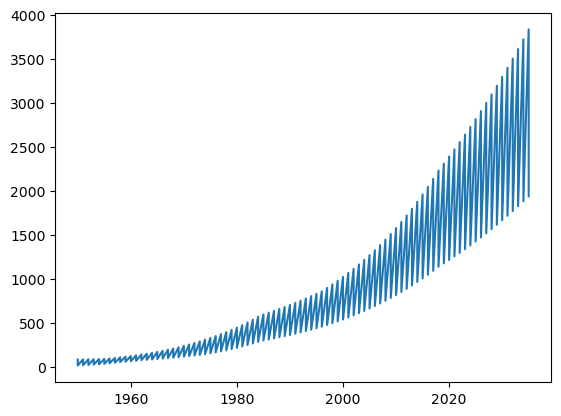

In [102]:
from matplotlib import pyplot as plt
plt.plot(df['year'],df['population'])

In [103]:
df.corr()

,year,population
year,1.000000,0.848296
population,0.848296,1.000000


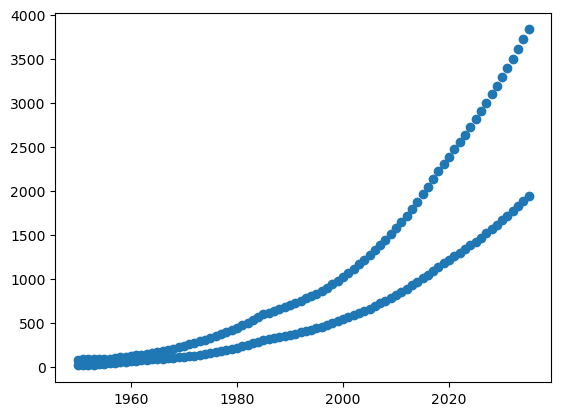

In [104]:
plt.scatter(df['year'],df['population'])

In [105]:
train = df[(df['year'] >= 1950) & (df['year'] < 2018)]
test = df[(df['year'] >= 2018) & (df['year'] <= 2035)]

In [106]:
print(train.shape)
print(test.shape)


(136, 3)
(36, 3)


In [107]:
from sklearn.preprocessing import LabelEncoder
encoding  = LabelEncoder()
train['City'] = encoding.fit_transform(train[['City']])
test['City'] = encoding.fit_transform(test[['City']])

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18016\1302161722.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['City'] = encoding.fit_transform(train[['City']])
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18016\130

In [108]:
from statsmodels.tsa.arima.model import ARIMA

In [109]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.population)
print("p-value",result[1])
result = adfuller(df.population.diff().dropna())
print('p-value',result[1])
result = adfuller(df.population.diff().diff().dropna())
print('p-value',result[1])

p-value 0.9975993812194446
p-value 0.9956174526123044
p-value 1.3013927591054745e-12


C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

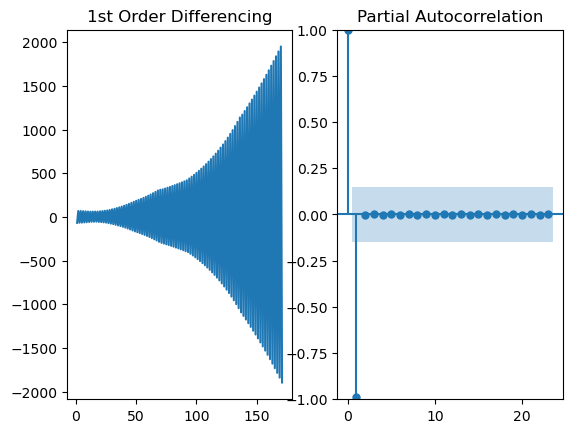

In [110]:
from statsmodels.graphics.tsaplots import plot_pacf
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.population.diff())
ax2 = f.add_subplot(122)
plot_pacf(df.population.diff().diff().dropna(),ax=ax2)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

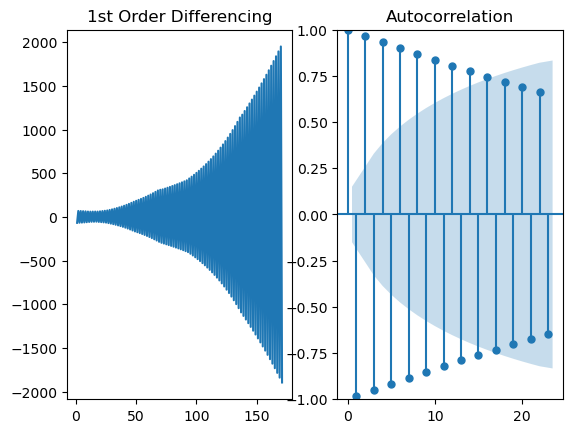

In [111]:
from statsmodels.graphics.tsaplots import plot_acf
f = plt.figure()
ax1 = f.add_subplot(121)
ax1.set_title('1st Order Differencing')
ax1.plot(df.population.diff())
ax2 = f.add_subplot(122)
plot_acf(df.population.diff().diff().dropna(),ax=ax2)
plt.show

In [112]:
from pmdarima.arima.utils import ndiffs 
ndiffs(df.population,test='adf')

2

In [113]:
result = ARIMA(train['population'], order=(1, 2, 2)).fit()

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [114]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             population   No. Observations:                  136
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -454.353
Date:                Wed, 03 May 2023   AIC                            916.706
Time:                        09:30:33   BIC                            928.298
Sample:                             0   HQIC                           921.417
                                - 136                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0000      0.000  -2135.599      0.000      -1.001      -0.999
ma.L1         -1.2895      0.049    -26.481      0.000      -1.385      -1.194
ma.L2          0.8943      0.045     20.042      0.000       0.807       0.982
sigma2        46.9673      6.646      7.067      0.000      33.941      59.994
===================================================================================
Ljung-Box (L1) (Q):                  73.27   Jarque-Bera (JB):                 2.09
Prob(Q):                              0.00   Prob(JB):                         0.35
Heteroskedasticity (H):              18.89   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [115]:
print('train data index', train.index)
print('test data index', test.index)

training_data1 = train['population'].values
test_data1 = test['population'].values

train data index Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            126, 127, 128, 129, 130, 131, 132, 133, 134, 135],
           dtype='int64', length=136)
test data index Int64Index([136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
            149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
            162, 163, 164, 165, 166, 167, 168, 169, 170, 171],
           dtype='int64')


In [116]:
history1 = [x for x in training_data1]
model_predictions1 = []
N_test_observations = len(test_data1)
for time_point in range(N_test_observations):
    model1 = sm.tsa.arima.ARIMA(history1, order=(1,2,2))
    model_fit = model1.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions1.append(yhat)
    true_test_value1 = test_data1[time_point]
    history1.append(true_test_value1)

C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ASUS\anaconda3\lib\site-packages\statsmodels\base\model.py:6

In [117]:
import numpy as np

In [118]:
mape1=np.mean(np.abs(model_predictions1 - test_data1)/np.abs(test_data1))
MSE_error1 = mean_squared_error(test_data1, model_predictions1)
print('Testing Mean Absolute Percentage Error is {}'.format(mape1))
print('Testing Mean Squared Error is {}'.format(MSE_error1))

Testing Mean Absolute Percentage Error is 0.008216450029633164
Testing Mean Squared Error is 308.318317502011


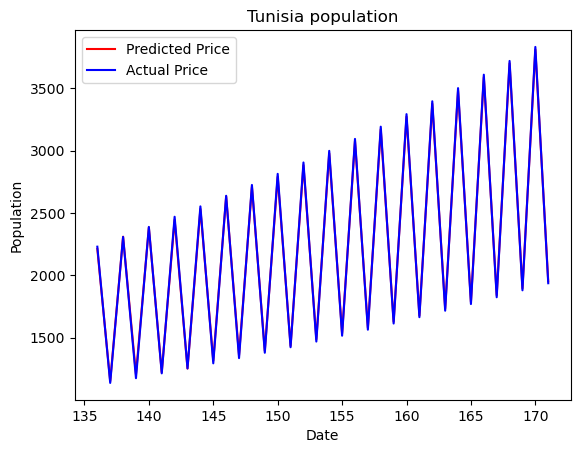

In [125]:
test_set_range = test.index
plt.plot(test_set_range, model_predictions1, color='red', label='Predicted Price')
plt.plot(test_set_range, test_data1, color='blue', label='Actual Price')
plt.title('Congo population')
plt.xlabel('Date')
plt.ylabel('Population')
plt.legend()
plt.show()

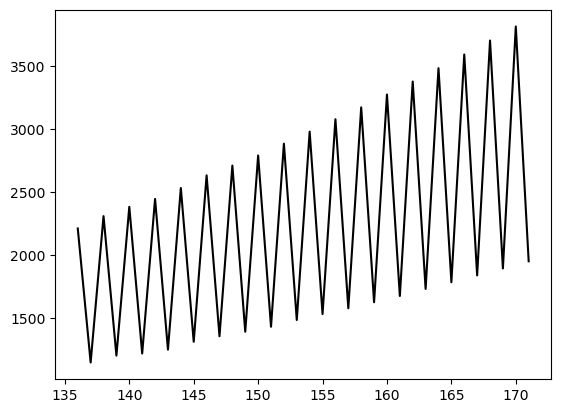

In [120]:
plt.plot(test_set_range, model_predictions1, color='black', label='Predicted Price')


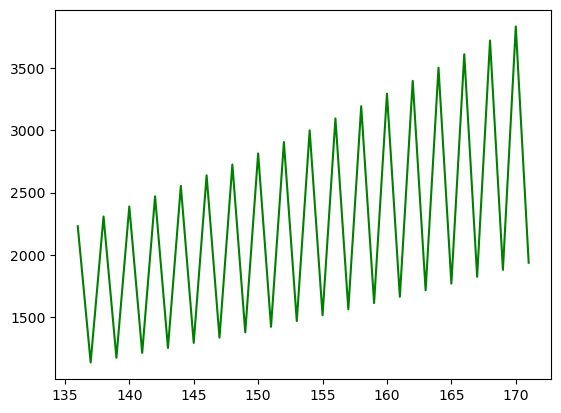

In [126]:
plt.plot(test_set_range, test_data1, color='green', label='Actual Price')


In [122]:
model_predictions1

[2211.8352709730007,
 1151.2507625508842,
 2309.612078439399,
 1205.707292722354,
 2383.19544021368,
 1222.5045878543447,
 2445.7034688910635,
 1252.7116541375935,
 2531.8742852770383,
 1315.0903730668247,
 2632.2855763643975,
 1358.8483062598798,
 2709.980379016467,
 1394.605893052928,
 2789.3801338288195,
 1434.0551970839092,
 2883.1626623453567,
 1487.397629697054,
 2978.3128617969005,
 1534.2640018922125,
 3076.872540300187,
 1580.2567281192592,
 3170.589068086475,
 1627.9485960753746,
 3272.1406715242165,
 1677.4551252352067,
 3375.038364400055,
 1733.53633526481,
 3480.703537650016,
 1786.0242978933024,
 3589.2395702145022,
 1840.397679803019,
 3699.577984230734,
 1895.6070787280382,
 3810.7871721195124,
 1952.0719357579246]

In [123]:
test_population_values = test['population'].values

In [124]:
pd.DataFrame({'Actual':test_population_values,'Prediction':model_predictions1})

,Actual,Prediction
0,2229.693,2211.835271
1,1137.609,1151.250763
2,2308.076,2309.612078
3,1175.513,1205.707293
4,2388.090,2383.195440
5,1214.281,1222.504588
6,2469.630,2445.703469
7,1253.939,1252.711654
8,2552.813,2531.874285
9,1294.612,1315.090373
